# Introduction
#Health insurance costs can be quite unpredictable and sometimes surprisingly high. As someone who's always curious about what drives these costs, I decided to dive into insurance data to understand the real factors behind medical charges. This project explores how different aspects like age, smoking habits, BMI, and family size actually affect what people pay for health insurance. It's like being a detective, but for insurance costs!

# Problem Statement
#When I looked at the insurance data, I noticed a big challenge right away - the cost numbers were all over the place! Some people paid very little while others had extremely high charges, and this uneven pattern was making it hard to spot clear relationships. My goal became clear: I needed to find a way to predict insurance costs accurately while understanding which factors matter most. Can we actually build a model that reliably estimates health insurance charges based on someone's profile?

# Import all Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df=pd.read_csv("C:\\UMAR DATA\\Data Sciences\\Intership\\Developer Hub\\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Basic Data Understanding

In [3]:
print(f'Shape of the Dataset:{df.shape}\n')
print(f'Null Values in Dataset:\n{df.isnull().sum()}\n')
print(f'Duplicated Values in Dataset:{df.duplicated().sum()}\n')
print(f'Drop Duplicated Values:{df.drop_duplicates(inplace=True)}\n')
print(f'Basic Information about Dataset:{df.info()}')

Shape of the Dataset:(1338, 7)

Null Values in Dataset:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Duplicated Values in Dataset:1

Drop Duplicated Values:None

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
Basic Information about Dataset:None


In [4]:
df_cate=df.select_dtypes(include='object')
df_category=df_cate.columns
print(f'Total Numbers of Categorical variable is {len(df_category)}')
df_num=df.select_dtypes(include='number')
df_number=df_num.columns
print(f'Total Number of Numerical data is {len(df_number)}')

Total Numbers of Categorical variable is 3
Total Number of Numerical data is 4


In [5]:
print(f'Basic Summary of Numerical Features:\n{df.describe()}')

Basic Summary of Numerical Features:
               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010


In [6]:
print(f"Basic Summary of Categorical Features:\n{df.describe(include='object')}")

Basic Summary of Categorical Features:
         sex smoker     region
count   1337   1337       1337
unique     2      2          4
top     male     no  southeast
freq     675   1063        364


In [7]:
def age_group(age):
    if age < 20:
        return 'Teen'
    elif age < 35:
        return 'Young'
    elif age < 60:
        return 'Men'
    else:
        return 'Old'
df['age_group'] = df['age'].apply(age_group)

# Exploratory Data Analysis

Text(0, 0.5, 'Frequency')

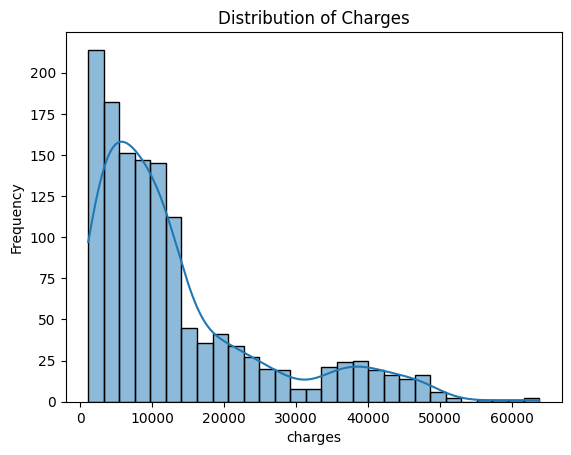

In [8]:
sns.histplot(data=df['charges'],kde=True)
plt.title('Distribution of Charges')
plt.ylabel('Frequency')

Box-Cox lambda parameter: 0.0435


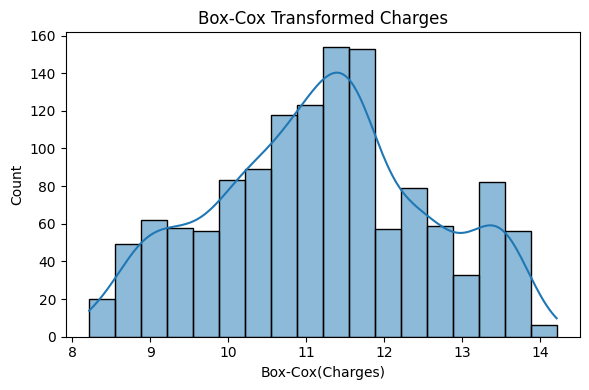

In [9]:
plt.figure(figsize=(6,4))
df['charges_boxcox'], fitted_lambda = stats.boxcox(df['charges'])
print(f"Box-Cox lambda parameter: {fitted_lambda:.4f}")
sns.histplot(data=df, x='charges_boxcox', kde=True)
plt.title('Box-Cox Transformed Charges')
plt.xlabel('Box-Cox(Charges)')
plt.tight_layout()


C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_11856\1093092184.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='Set1')
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_11856\1093092184.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='Set1')
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_11856\1093092184.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='Set1')
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_11856\1093092184.py:6: FutureWarning: 



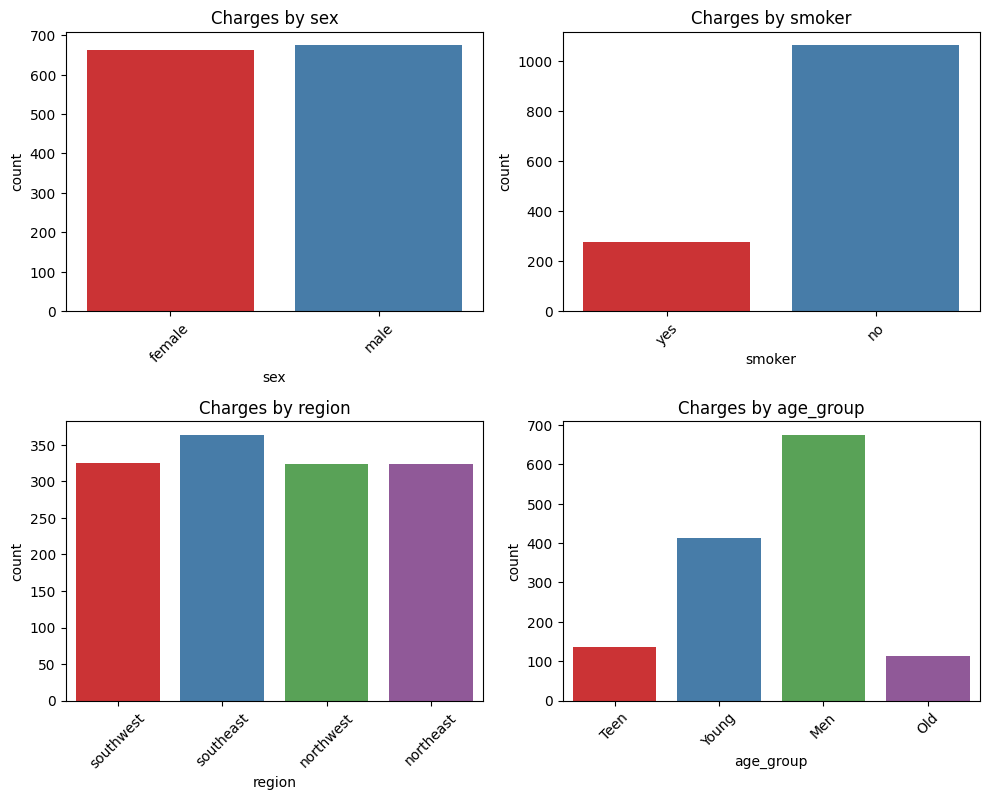

In [10]:
plt.figure(figsize=(10,15))
df_cate=df.select_dtypes(include='object')
for i,col in enumerate(df_cate):
    if col!='charges':
        plt.subplot(4,2,i+1)
        sns.countplot(data=df,x=col,palette='Set1')
        plt.title(f'Charges by {col}')
        plt.xticks(rotation=45)
plt.tight_layout()

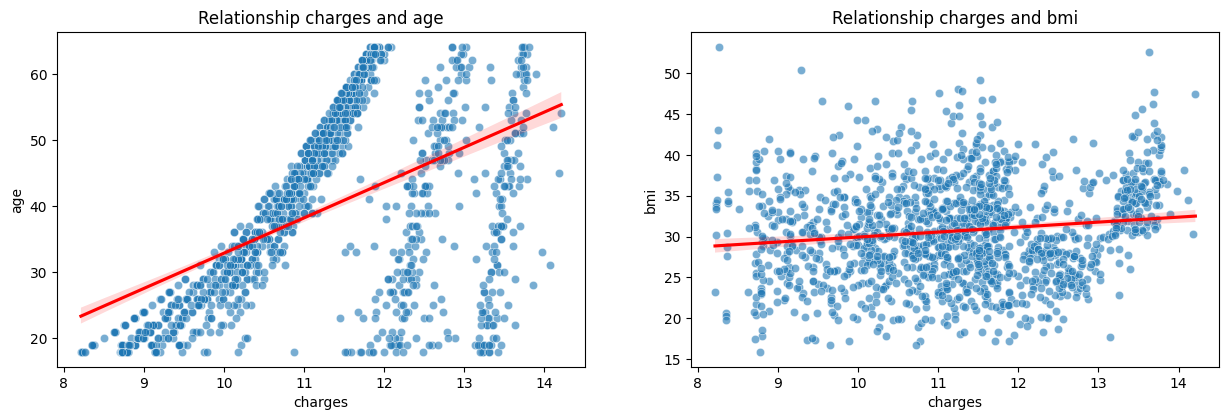

In [11]:
plt.figure(figsize=(15, 20))
data=["age","bmi"]
for i,col in enumerate(data):
    plt.subplot(4,2,i+1)
    sns.scatterplot(data=df, x="charges_boxcox", y=col, alpha=0.6)
    sns.regplot(data=df, x='charges_boxcox', y=col, scatter=False, color='red')
    plt.title(f'Relationship charges and {col}')
    plt.xlabel('charges')
    plt.ylabel(col)

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_11856\3465911285.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='charges_boxcox', palette='viridis')
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_11856\3465911285.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='charges_boxcox', palette='viridis')
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_11856\3465911285.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='charges_boxcox', palette='viridis')
C:\Users\Qadri Laptop\

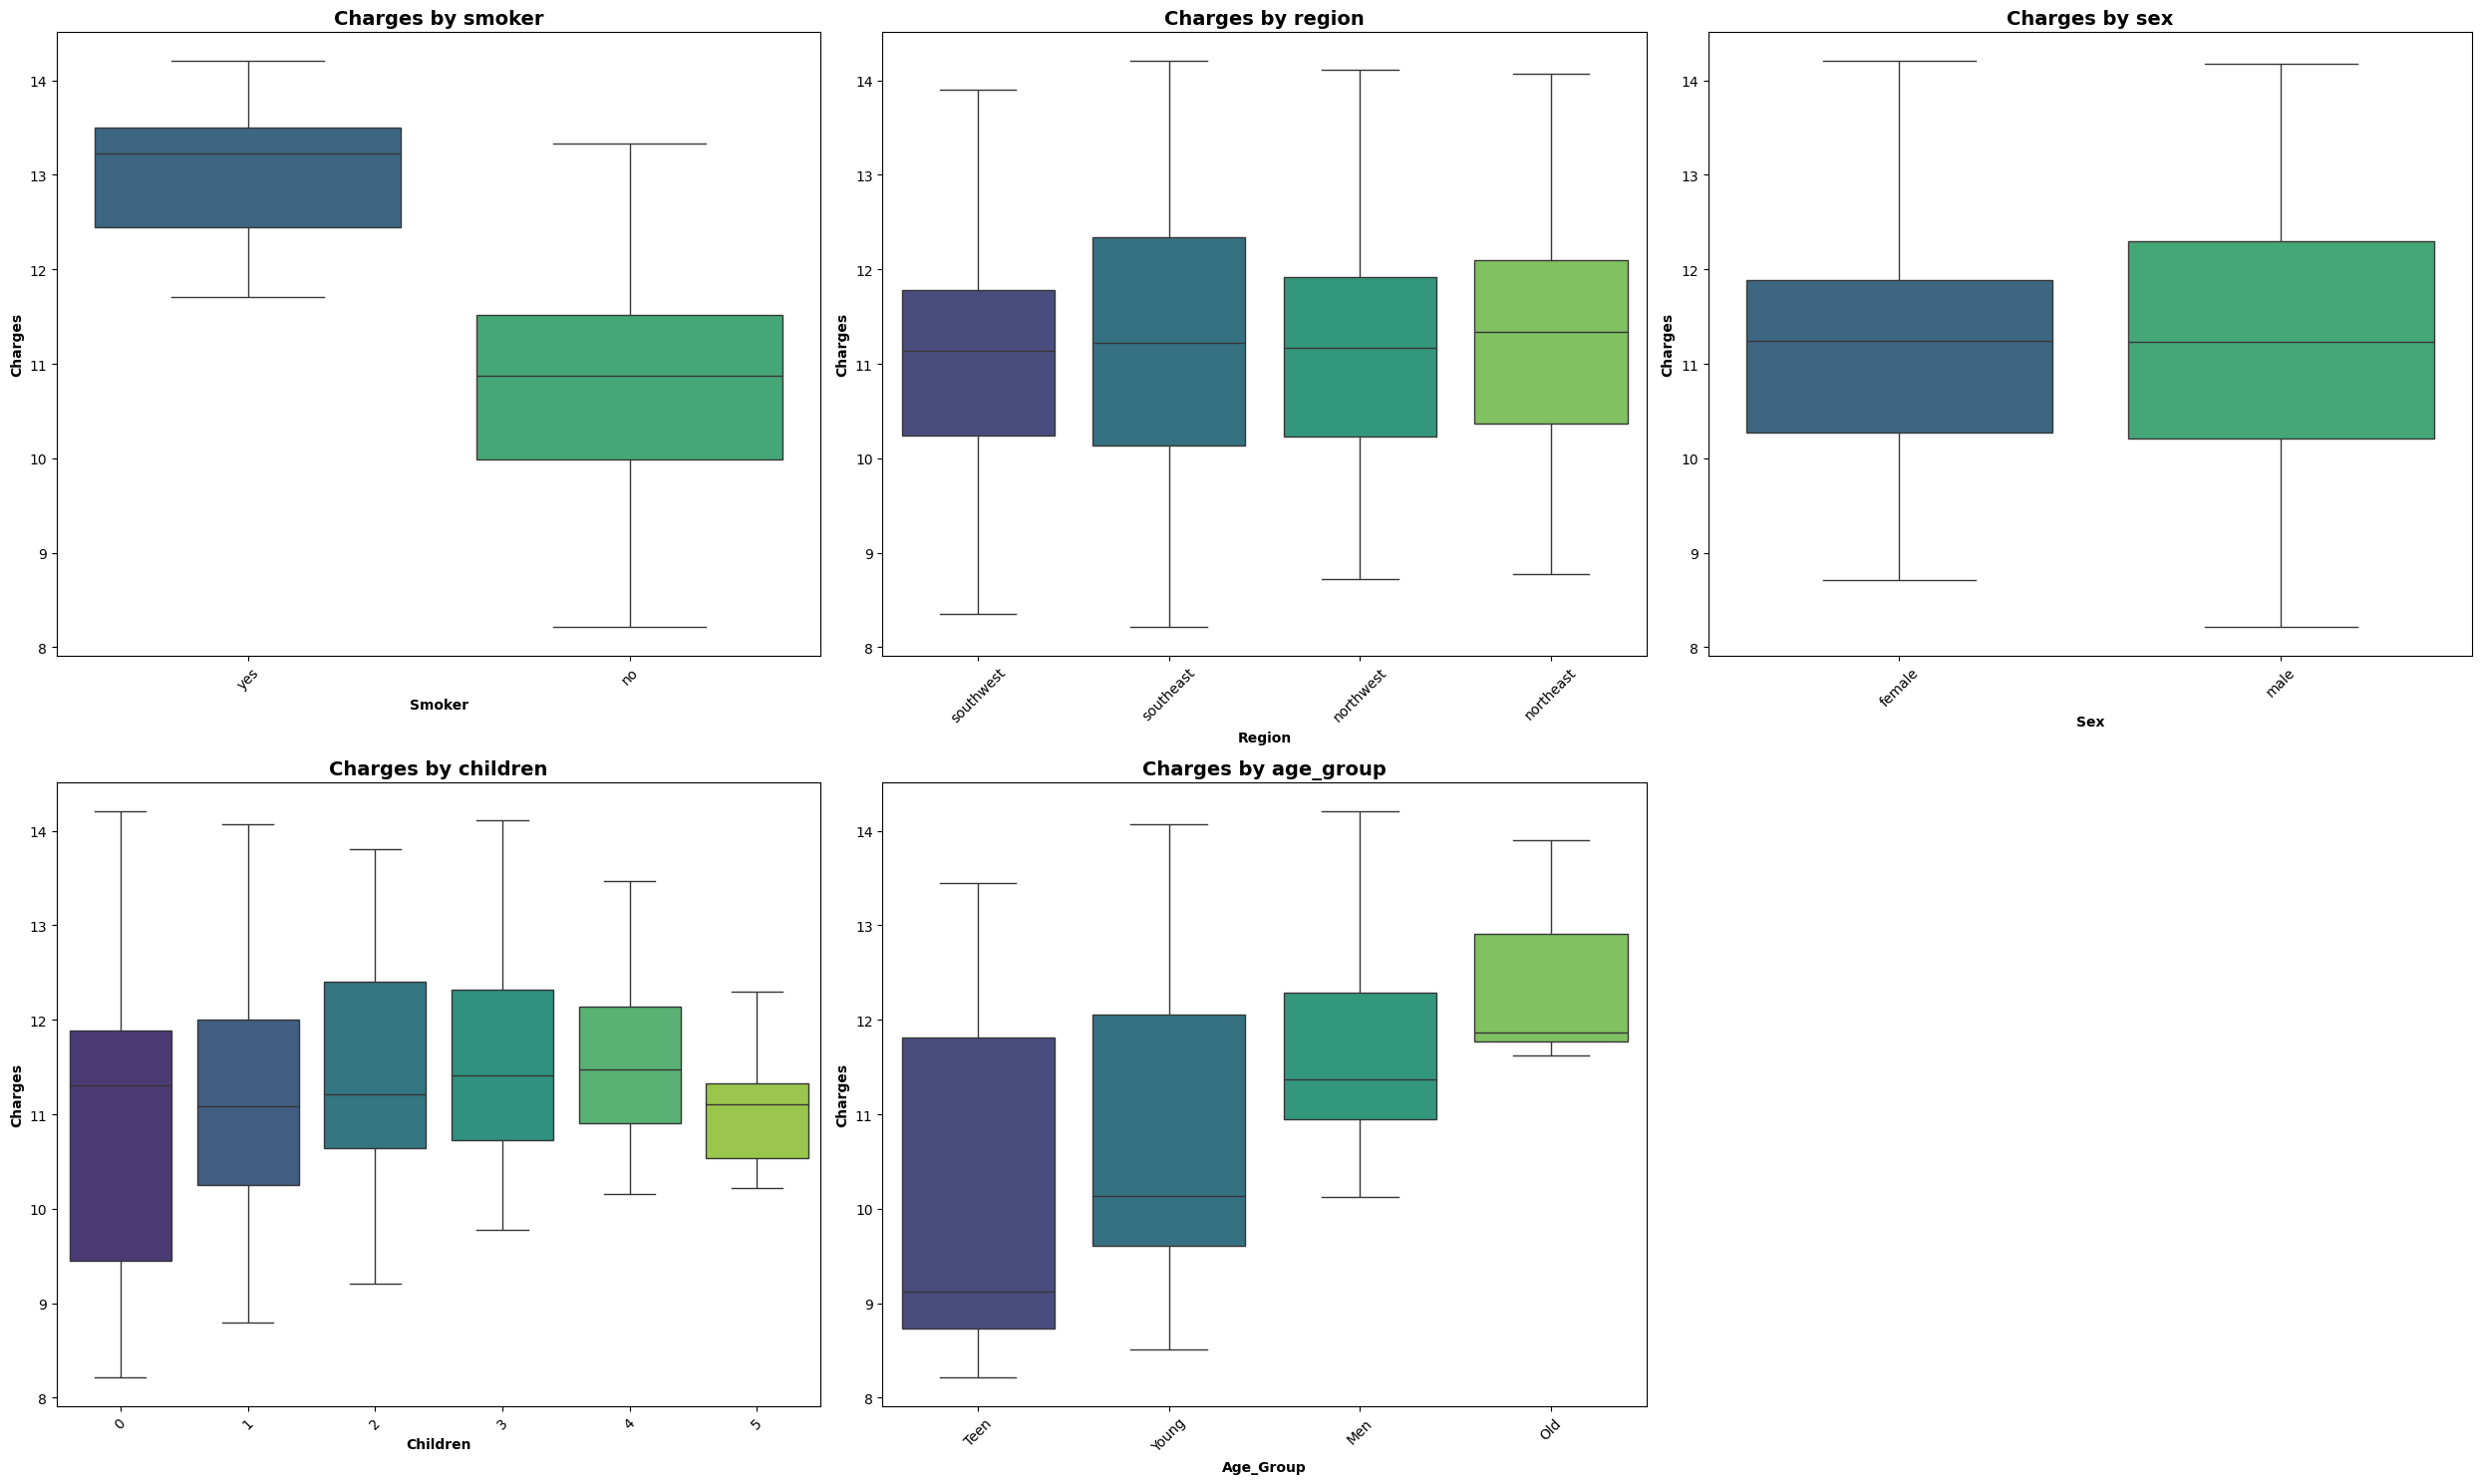

In [12]:
plt.figure(figsize=(25, 15))
data = ['smoker', 'region', 'sex','children','age_group']
for i, col in enumerate(data):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x=col, y='charges_boxcox', palette='viridis')
    plt.title(f'Charges by {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col.title(), fontweight='bold')
    plt.ylabel('Charges', fontweight='bold')
    plt.xticks(rotation=45)
plt.tight_layout()

# Data Preprocessing

In [13]:
df=pd.get_dummies(data=df,columns=['sex','smoker','region','age_group'],dtype=int)
df.head()

,age,bmi,children,charges,charges_boxcox,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age_group_Men,age_group_Old,age_group_Teen,age_group_Young
0,19,27.900,0,16884.92400,12.120634,1,0,0,1,0,0,0,1,0,0,1,0
1,18,33.770,1,1725.55230,8.804026,0,1,1,0,0,0,1,0,0,0,1,0
2,28,33.000,3,4449.46200,10.141549,0,1,1,0,0,0,1,0,0,0,0,1
3,33,22.705,0,21984.47061,12.526076,0,1,1,0,0,1,0,0,0,0,0,1
4,32,28.880,0,3866.85520,9.939887,0,1,1,0,0,1,0,0,0,0,0,1


# Train Test Split

In [14]:
x=df.drop(['charges_boxcox','charges','age'],axis='columns')
y=df['charges_boxcox']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# Model Training and Evaluation

In [16]:
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'LinearRegression': LinearRegression()
}
results = {}
best_model = None
best_rmse = float('inf')
print("MODEL PERFORMANCE COMPARISON:")
print("=" * 60)
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {
        'model': model,
        'mae': mae,
        'rmse': rmse,
        'predictions': y_pred
    }
    print(f"{name:16} | MAE: {mae:8.4f} | RMSE: {rmse:8.4f}")
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = name
print("=" * 60)
print(f"BEST MODEL: {best_model}")
print(f"BEST RMSE: {best_rmse:.4f}")
print("=" * 60)
print("\nMODELS RANKED BY RMSE (Lower is Better):")
print("-" * 45)
sorted_results = sorted(results.items(), key=lambda x: x[1]['rmse'])
for rank, (name, result) in enumerate(sorted_results, 1):
    print(f"{rank}. {name:16} | RMSE: {result['rmse']:.4f} | MAE: {result['mae']:.4f}")

MODEL PERFORMANCE COMPARISON:
RandomForest     | MAE:   0.3906 | RMSE:   0.6279
XGBoost          | MAE:   0.4597 | RMSE:   0.6950
LinearRegression | MAE:   0.4897 | RMSE:   0.6676
BEST MODEL: RandomForest
BEST RMSE: 0.6279

MODELS RANKED BY RMSE (Lower is Better):
---------------------------------------------
1. RandomForest     | RMSE: 0.6279 | MAE: 0.3906
2. LinearRegression | RMSE: 0.6676 | MAE: 0.4897
3. XGBoost          | RMSE: 0.6950 | MAE: 0.4597


# Conclusion

#After testing three machine learning models to predict insurance costs, Random Forest performed best with the lowest average error of 0.63 units, followed by Linear Regression (0.67) and XGBoost (0.70). Random Forest excelled by capturing complex interactions, unlike Linear Regression’s simple assumptions or XGBoost’s potential overfitting. The analysis highlighted smoking as the top factor driving costs, suggesting quitting smoking is key to lowering premiums.